In [227]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [228]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [229]:
import seaborn as sns
import pandas as pd
import statistics as stc
import numpy as npy
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
from scipy import stats
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [275]:
df = pd.read_csv('amzn_raw_data.csv', usecols=['init_day', 'open', 'high', 'low', 'close', 'volume', 'adjusted_close', 'change_percent', 'avg_vol_20d'])


In [276]:
df.head()

,init_day,open,high,low,close,volume,adjusted_close,change_percent,avg_vol_20d
0,1997-05-15,29.256,30.000,23.124,23.496,6008999,0.0979,NaN,NaN
1,1997-05-16,23.628,23.748,20.496,20.748,1224999,0.0865,-11.64,NaN
2,1997-05-19,21.120,21.252,19.500,20.496,508899,0.0854,-1.27,NaN
3,1997-05-20,20.748,21.000,19.620,19.620,455599,0.0818,-4.22,NaN
4,1997-05-21,19.620,19.752,16.500,17.124,1571099,0.0714,-12.71,NaN


In [277]:
df.shape


(6743, 9)

### Mostrar informacion basica del dataset

In [278]:
df['init_day']

0       1997-05-15
1       1997-05-16
2       1997-05-19
3       1997-05-20
4       1997-05-21
           ...    
6738    2024-02-26
6739    2024-02-27
6740    2024-02-28
6741    2024-02-29
6742    2024-03-01
Name: init_day, Length: 6743, dtype: object

In [279]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6743 entries, 0 to 6742
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   init_day        6743 non-null   object 
 1   open            6743 non-null   float64
 2   high            6743 non-null   float64
 3   low             6743 non-null   float64
 4   close           6743 non-null   float64
 5   volume          6743 non-null   int64  
 6   adjusted_close  6743 non-null   float64
 7   change_percent  6742 non-null   float64
 8   avg_vol_20d     6724 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 474.2+ KB


### Describe los datos de manera estadististica

In [280]:
df.describe()

,open,high,low,close,volume,adjusted_close,change_percent,avg_vol_20d
count,6743.000000,6743.000000,6743.000000,6743.000000,6.743000e+03,6743.000000,6742.000000,6.724000e+03
mean,557.764646,564.330196,550.521124,557.556973,9.782548e+06,35.114015,0.173714,1.394389e+08
std,907.527950,917.470361,896.168758,906.763703,1.580062e+07,50.967317,3.564684,1.003812e+08
min,5.910000,6.100000,5.510000,5.970000,2.230000e+04,0.069800,-24.770000,2.534160e+07
25%,47.348000,48.497000,46.135000,47.376000,3.426878e+06,2.054250,-1.310000,7.427122e+07
50%,127.760000,129.930000,125.400000,127.610000,5.373099e+06,7.853000,0.045000,1.139504e+08
75%,530.040000,537.365000,523.425000,531.465000,8.366862e+06,48.251250,1.480000,1.663014e+08
max,3744.000100,3773.078100,3696.793100,3731.410100,2.231334e+08,186.570500,34.470000,8.328822e+08


### Revisar la cantidad de datos nulos

In [281]:
df.isnull()

,init_day,open,high,low,close,volume,adjusted_close,change_percent,avg_vol_20d
0,False,False,False,False,False,False,False,True,True
1,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...
6738,False,False,False,False,False,False,False,False,False
6739,False,False,False,False,False,False,False,False,False
6740,False,False,False,False,False,False,False,False,False
6741,False,False,False,False,False,False,False,False,False


In [282]:
df.isnull().sum().to_frame()

,0
init_day,0
open,0
high,0
low,0
close,0
volume,0
adjusted_close,0
change_percent,1
avg_vol_20d,19


### Limpieza de datos


In [283]:
df['volume'] = df['volume'].round(5)


In [284]:
df.head()

,init_day,open,high,low,close,volume,adjusted_close,change_percent,avg_vol_20d
0,1997-05-15,29.256,30.000,23.124,23.496,6008999,0.0979,NaN,NaN
1,1997-05-16,23.628,23.748,20.496,20.748,1224999,0.0865,-11.64,NaN
2,1997-05-19,21.120,21.252,19.500,20.496,508899,0.0854,-1.27,NaN
3,1997-05-20,20.748,21.000,19.620,19.620,455599,0.0818,-4.22,NaN
4,1997-05-21,19.620,19.752,16.500,17.124,1571099,0.0714,-12.71,NaN


In [285]:
df.fillna(0, inplace=True)

In [286]:
df.head()

,init_day,open,high,low,close,volume,adjusted_close,change_percent,avg_vol_20d
0,1997-05-15,29.256,30.000,23.124,23.496,6008999,0.0979,0.00,0.0
1,1997-05-16,23.628,23.748,20.496,20.748,1224999,0.0865,-11.64,0.0
2,1997-05-19,21.120,21.252,19.500,20.496,508899,0.0854,-1.27,0.0
3,1997-05-20,20.748,21.000,19.620,19.620,455599,0.0818,-4.22,0.0
4,1997-05-21,19.620,19.752,16.500,17.124,1571099,0.0714,-12.71,0.0


## SE TRABAJA EN LA MEDIA TRUNCADA

In [287]:
stats.trim_mean(df['open'], 0.1)

332.8679056163114

### La interpretación de 332.8679056163114, es que representa el valor medio de la columna 'open' después de eliminar el 10% de los valores más bajos y el 10% de los valores más altos de esa columna. En otras palabras, este valor puede ser menos sensible a valores extremos en comparación con la media aritmética estándar.

# Estimados de locacion

# Media

In [288]:
mean_open = df['open'].mean()

## Moda

In [349]:
df['open'].mode()

0    33.5
Name: open, dtype: float64

## Mediana

In [289]:
df['open'].median()

127.76

## Desviacion Estandar

In [290]:
std_open = df['open'].std()

### Se realiza la desviacion estandar donde se determina que no esta muy dispersa en relacion con el valor mas tipico 

# Rango

In [291]:
df['open'].max() - df['open'].min()

3738.0901000000003

# Porcentiles

In [292]:
df['open'].quantile(0.8)

833.6000000000004

## Esto sugiere que el 80% de los datos en la columna 'open' son menores o iguales a este valor, mientras que el 20% restante son mayores que este valor.

In [293]:
print(f'Valor mínimo: {df["open"].min()}')
print(f'Percentil 10: {df["open"].quantile(0.1)}')
print(f'Percentil 25: {df["open"].quantile(0.25)}')
print(f'Percentil 50: {df["open"].median()}')
print(f'Percentil 75: {df["open"].quantile(0.75)}')
print(f'Percentil 90: {df["open"].quantile(0.9)}')
print(f'Valor máximo: {df["open"].max()}')

Valor mínimo: 5.91
Percentil 10: 27.194000000000003
Percentil 25: 47.348
Percentil 50: 127.76
Percentil 75: 530.04
Percentil 90: 1883.198
Valor máximo: 3744.0001


### Valor mínimo (5.91): Este valor indica el precio mínimo registrado para las acciones de Amazon en el período de tiempo analizado. Es el precio más bajo al que las acciones han sido vendidas.

### Percentil 10 (27.194): Este valor representa el percentil 10 de los precios de las acciones de Amazon en el período de tiempo analizado. Esto significa que el 10% de los precios están por debajo de este valor y el 90% están por encima.

### Percentil 25 (47.348): El percentil 25 es el valor que divide al conjunto de datos en dos partes iguales, donde el 25% de los precios son menores o iguales a este valor, y el 75% son mayores.

### Percentil 50 (127.76): Este valor corresponde a la mediana de los precios de las acciones de Amazon en el período de tiempo analizado. Es el valor que se encuentra en el centro de la distribución, donde el 50% de los precios son menores o iguales a este valor, y el 50% son mayores.

### Percentil 75 (530.04): El percentil 75 es el valor que divide al conjunto de datos en dos partes iguales, donde el 75% de los precios son menores o iguales a este valor, y el 25% son mayores.

### Percentil 90 (1883.198): Este valor representa el percentil 90 de los precios de las acciones de Amazon en el período de tiempo analizado. El 90% de los precios están por debajo de este valor y el 10% están por encima.

### Valor máximo (3744.0001): Indica el precio máximo registrado para las acciones de Amazon en el período de tiempo analizado. Es el precio más alto al que las acciones han sido vendidas.

# Rango intercuartílico

In [294]:
df["open"].quantile(0.75) - df["open"].quantile(0.25)

482.69199999999995

## Este valor indica una ligera dispercion en los datos en concordancia en al total de los datos

<Axes: xlabel='open'>

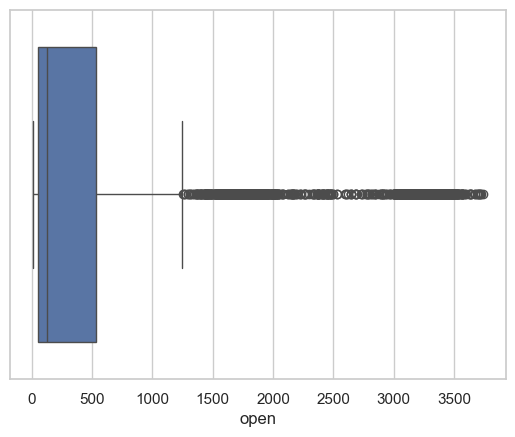

In [295]:
sns.set(style="whitegrid")
sns.boxplot(x=df['open'])

## se denota que la informacion esta abarcada en calores menores a 600 y que el valor de apertura de la accion son anomalias en los datos, se hace notar que el calor de la accion estuvo mucho tiempo en valores inferiroes a 600 dolares.

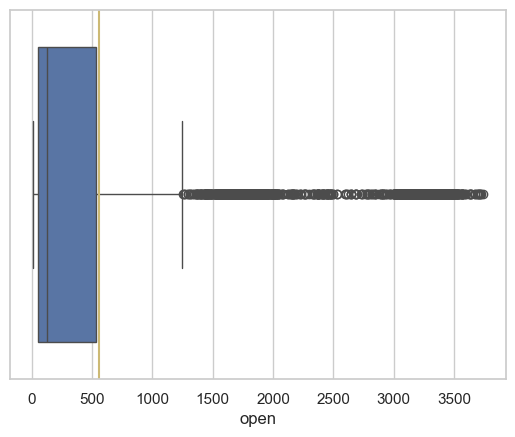

In [296]:
sns.set(style="whitegrid")
sns.boxplot(x=df['open'])
plt.axvline(df['open'].mean(), c='y')

## como podemos observar se hace la linea que muestra el promedio de los datos la cual se encuentra un poco alejada del mediana pero en una posicion mas centrica a los valores atipicos 

In [297]:
iqr = df['open'].quantile(0.75) - df['open'].quantile(0.25)
filtro_inferior = df['open'] > df['open'].quantile(0.25) - (iqr * 2.5)
filtro_superior = df['open'] < df['open'].quantile(0.75) + (iqr * 2.5)

df_filtrado = df[filtro_inferior & filtro_superior]


In [298]:
df_filtrado_stacked = df_filtrado.stack()
df_filtrado_horizontal = df_filtrado_stacked.unstack()

<Axes: xlabel='open'>

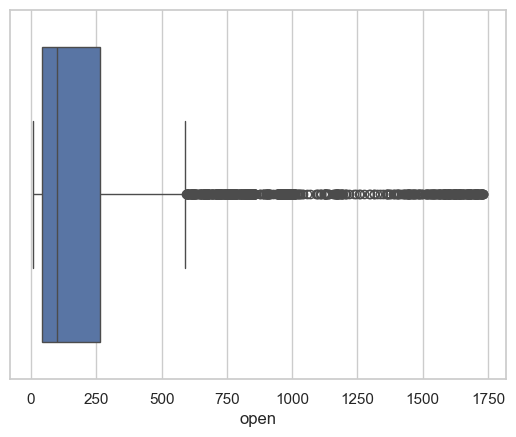

In [299]:
sns.boxplot(x=df_filtrado['open'])

## se hace el filtrado de el rango intercuantilico y los valores atipicos sin embargo por la nautaleza de los datos no se ve mucha diferencia

In [300]:
opend =  df['open']
opend.max() - opend.min()

3738.0901000000003

# Tabla de frecuecias

In [301]:
pd.cut(opend, 20)

0       (2.172, 192.815]
1       (2.172, 192.815]
2       (2.172, 192.815]
3       (2.172, 192.815]
4       (2.172, 192.815]
              ...       
6738    (2.172, 192.815]
6739    (2.172, 192.815]
6740    (2.172, 192.815]
6741    (2.172, 192.815]
6742    (2.172, 192.815]
Name: open, Length: 6743, dtype: category
Categories (20, interval[float64, right]): [(2.172, 192.815] < (192.815, 379.719] < (379.719, 566.624] < (566.624, 753.528] ... (2996.382, 3183.287] < (3183.287, 3370.191] < (3370.191, 3557.096] < (3557.096, 3744.0]]

In [302]:
segmentos = pd.cut(opend,20)
df['open'].groupby(segmentos).count()

open
(2.172, 192.815]        4027
(192.815, 379.719]       863
(379.719, 566.624]       211
(566.624, 753.528]       176
(753.528, 940.433]       183
(940.433, 1127.337]      138
(1127.337, 1314.242]      44
(1314.242, 1501.146]      51
(1501.146, 1688.051]     132
(1688.051, 1874.955]     234
(1874.955, 2061.86]      134
(2061.86, 2248.764]       22
(2248.764, 2435.669]      33
(2435.669, 2622.573]      23
(2622.573, 2809.478]      17
(2809.478, 2996.382]      23
(2996.382, 3183.287]     137
(3183.287, 3370.191]     177
(3370.191, 3557.096]      93
(3557.096, 3744.0]        25
Name: open, dtype: int64

## se denota que se mantuvo un perido donde el rango de precio de la accion estuvo entre 2.72 a 192.85 y de ahi viene el salto entre altas y bajas en el precio hasta llegar hasta su maximo historico donde el rango se hizo pequeños, perosi se ve la variabilidad en valores atipicos.

# HISTOGRAMAS

In [303]:
sns.set(style='dark')

/var/folders/zx/259md1zj1gv342qj0rq5wk8h0000gq/T/ipykernel_10501/3934023371.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['open'], kde=False, norm_hist=False, bins=20)


<Axes: xlabel='open'>

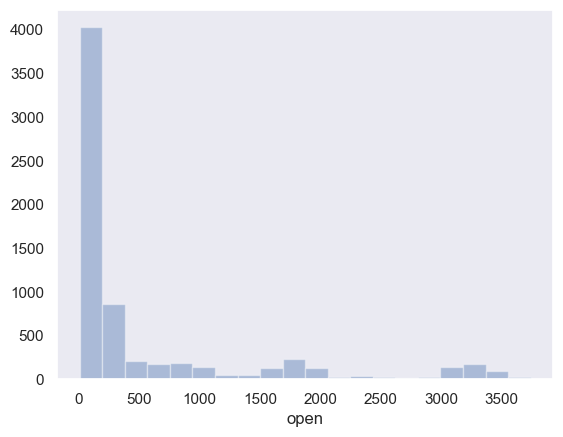

In [304]:
sns.distplot(df['open'], kde=False, norm_hist=False, bins=20)

/var/folders/zx/259md1zj1gv342qj0rq5wk8h0000gq/T/ipykernel_10501/471456250.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['open'], kde=False, norm_hist=False, bins=100)


<Axes: xlabel='open'>

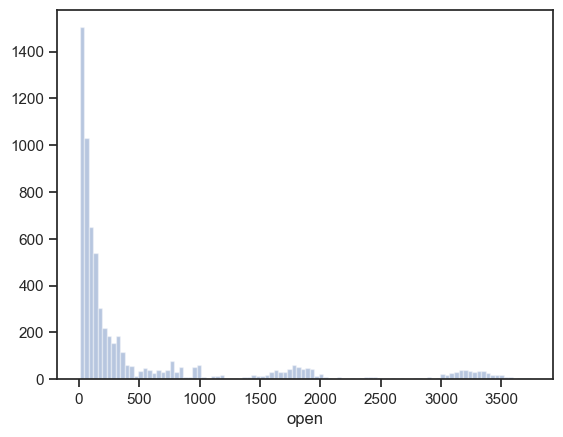

In [305]:
sns.set(style='ticks')
sns.distplot(df['open'], kde=False, norm_hist=False, bins=100)

## se ve la disparidad de los precios de apertura de la accion y asi hasta llegar a sus maximos historicos dando nota que se matuvo mucho tiempo de precios inferiores a $500 dls

In [306]:
sns.set(style='white')

In [329]:
normal = npy.random.normal(loc=mean_open, scale=std_open, size=10000)

/var/folders/zx/259md1zj1gv342qj0rq5wk8h0000gq/T/ipykernel_10501/2678413288.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(normal, kde=False, norm_hist=False);


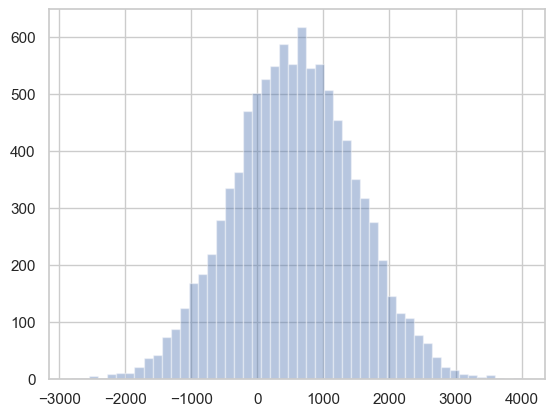

In [330]:
sns.distplot(normal, kde=False, norm_hist=False);


In [328]:
print(f'Curtosis: {kurtosis(normal)}')
print(f'Asimetría: {skew(normal)}')

Curtosis: -0.07281657799413077
Asimetría: 0.038684898088252394


## la curtosis es de -0.07281657799413077, lo que sugiere que la distribución de los datos es casi normal. Esto significa que la distribución tiene colas ligeramente más pesadas que una distribución normal estándar, pero la diferencia es muy pequeña.
## la asimetría es de 0.038684898088252394, lo que indica una ligera asimetría hacia la derecha, aunque la magnitud de la asimetría es mínima.
## los datos tienen una forma casi normal, con una ligera asimetría hacia la derecha y colas ligeramente más pesadas que una distribución normal estándar.

# Graficas de densidad

In [310]:

sns.set(style='whitegrid')

/var/folders/zx/259md1zj1gv342qj0rq5wk8h0000gq/T/ipykernel_10501/3166387436.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(laplace, hist=False);


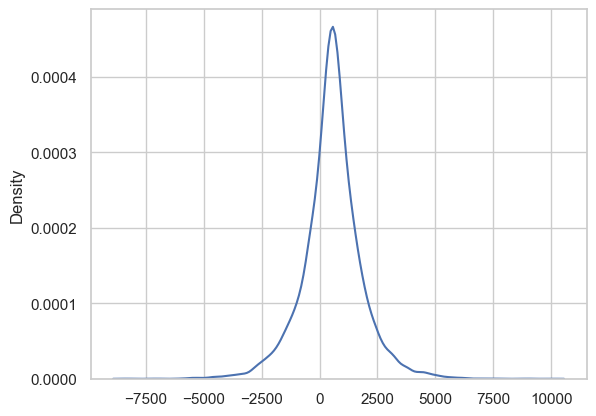

In [311]:
laplace = npy.random.laplace(loc=mean_open, scale=std_open, size=10000)
sns.distplot(laplace, hist=False);
warnings.filterwarnings("ignore", category=FutureWarning)

/var/folders/zx/259md1zj1gv342qj0rq5wk8h0000gq/T/ipykernel_10501/2961975953.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['open'], hist=False)


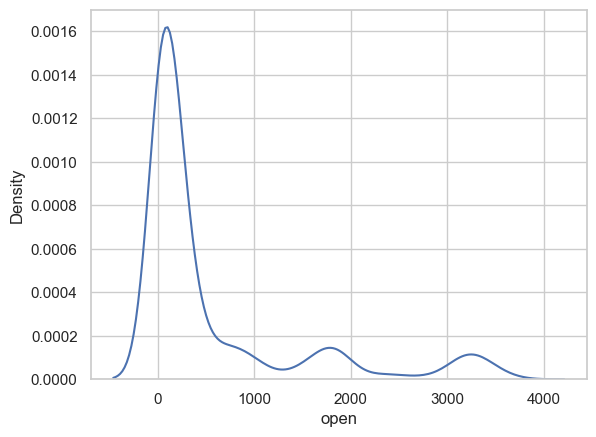

In [312]:
sns.distplot(df['open'], hist=False)
plt.show()

In [313]:
sns.kdeplot(df['volume'], shade=True, color="b", label="Volume", ax=ax)


<Axes: title={'center': 'Comparacion de variacion entre cambio porcentual y ajuste de cierre'}, xlabel='Valor', ylabel='Densidad'>

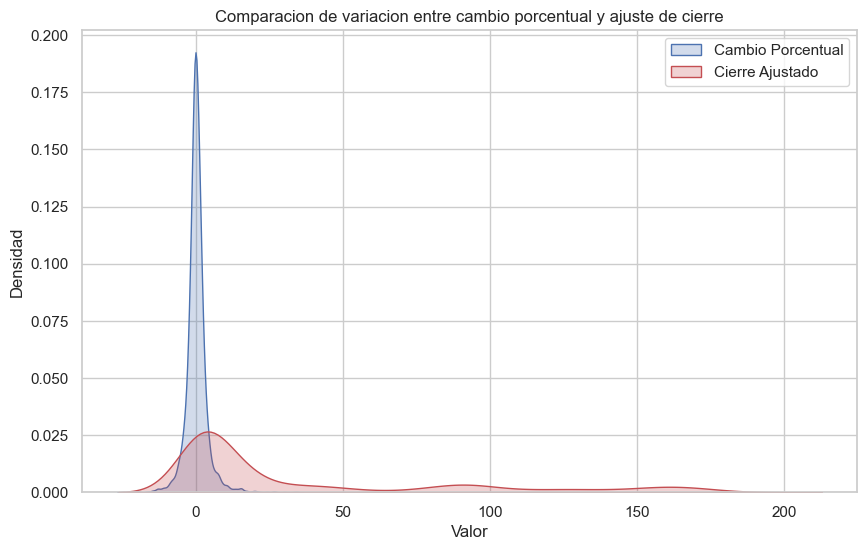

In [314]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.kdeplot(df['change_percent'], shade=True, color="b", label="Cambio Porcentual", ax=ax)
sns.kdeplot(df['adjusted_close'], shade=True, color="r", label="Cierre Ajustado", ax=ax)
ax.set_xlabel("Valor")
ax.set_ylabel("Densidad")
ax.set_title("Comparacion de variacion entre cambio porcentual y ajuste de cierre")
ax.legend(loc = 'upper right')  # Agrega la leyenda
plt.show()

## En esta grafica se hace una comparacion entre el cambio procentual y el ajuste de cierre viendose una gra variacion de un dato con otro

# Histogramas para las variables numéricas

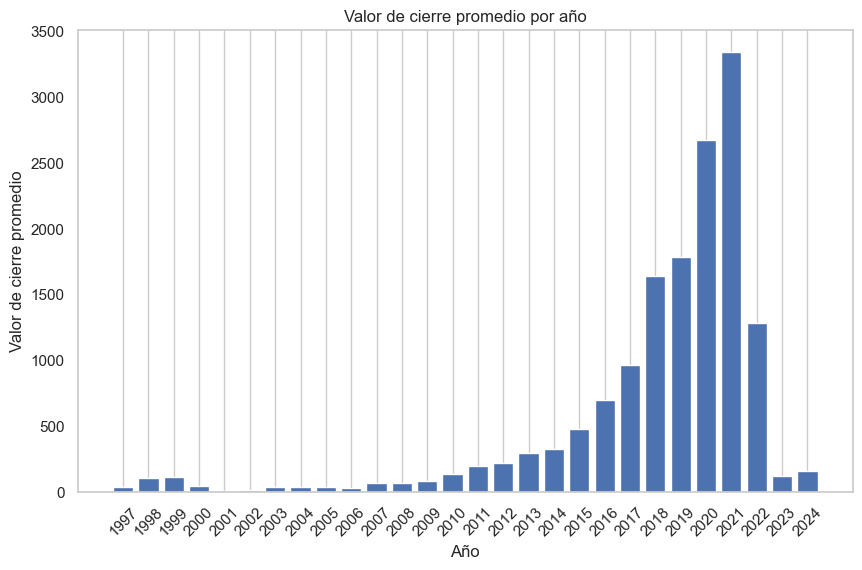

In [324]:
df['init_day'] = pd.to_datetime(df['init_day'])
df['year'] = df['init_day'].dt.year
grouped_data = df.groupby('year')['close'].mean()
plt.figure(figsize=(10, 6))
plt.bar(grouped_data.index, grouped_data.values, color='b')
plt.xticks(grouped_data.index, rotation=45)
plt.xlabel('Año')
plt.ylabel('Valor de cierre promedio')
plt.title('Valor de cierre promedio por año')
plt.xticks(grouped_data.index) 
plt.grid(axis='y') 
plt.show()

## se ve el movimiento de la accion a travez de los años habiendo una sibida constante hasta el desdoblamiento de acciones ocurrida en 2023, pero aun asi manteniendo un crecimiento constante en el valor de la accon

In [341]:
from matplotlib.colors import LinearSegmentedColormap
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

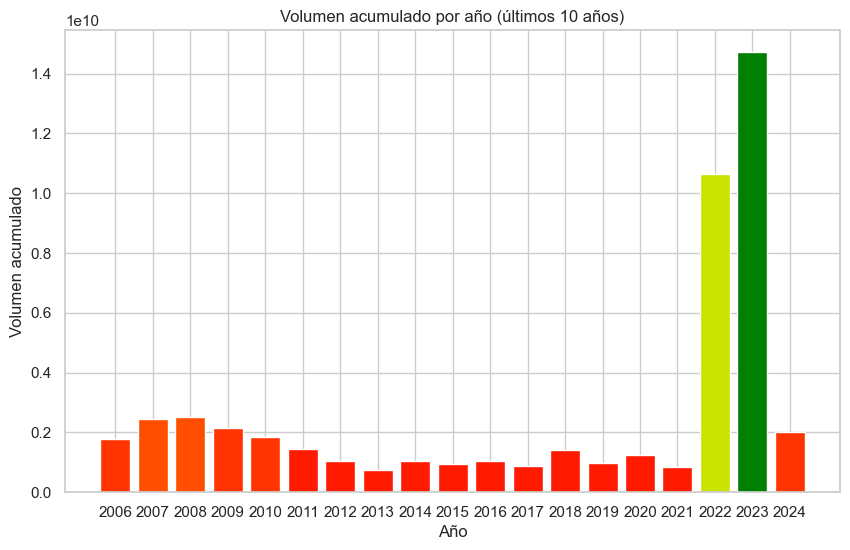

In [348]:
# Supongamos que tienes un DataFrame df con las columnas 'init_day' y 'volume'

# Convertir la columna 'init_day' a un tipo de dato de fecha
df['init_day'] = pd.to_datetime(df['init_day'])

# Extraer el año de la columna 'init_day'
df['year'] = df['init_day'].dt.year

# Filtrar los datos para incluir solo los últimos 19 años
last_10_years_df = df[df['year'] >= df['year'].max() - 18]

# Agrupar los volúmenes por año y calcular el volumen acumulado
grouped_data = last_10_years_df.groupby('year')['volume'].sum()

# Definir los colores de degradado
colors = ['red', 'orange', 'yellow', 'green']  # Rojo a verde pasando por naranja y amarillo
cmap_name = 'custom_gradient'
n_bins = 20  # Número de bins para el degradado

# Crear el mapa de colores personalizado
cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Crear el gráfico de barras con el degradado de color
plt.figure(figsize=(10, 6))
bars = plt.bar(grouped_data.index, grouped_data.values, color=cmap(grouped_data.values / grouped_data.values.max()))

# Configurar etiquetas y título
plt.xlabel('Año')
plt.ylabel('Volumen acumulado')
plt.title('Volumen acumulado por año (últimos 10 años)')

# Asegurar que las etiquetas del eje x muestren todos los años
plt.xticks(grouped_data.index)

# Crear un eje de color separado
cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=cmap))
cbar.set_label('Volumen acumulado')


plt.show()

## aqui se ve como el volumen de operaciones que tuvo la accion estuvo estable hasta la llegada de la pandemia lo que causo un aumento considerado el el valor de la acciion de amazon obviamente al regresar a la nueva normalidad se ve una caida considerable en comparacion con los años 2007,2008.

# Variables categoricas

In [355]:
pd.crosstab(df['open'], df['year'], margins=True, margins_name='total')

year,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,total
open,,,,,,,,,,,,,,,,,,,,,
5.91,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6.17,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
6.25,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6.47,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6.79,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3712.6901,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3717.3771,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3722.5201,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


## en ausencia de variables categóricas, el análisis se centrarán principalmente en entender las relaciones y patrones dentro de estas variables numéricas, como las tendencias de los precios, la volatilidad del mercado, el volumen de negociación, etc.

# Se grafican multiplex axis

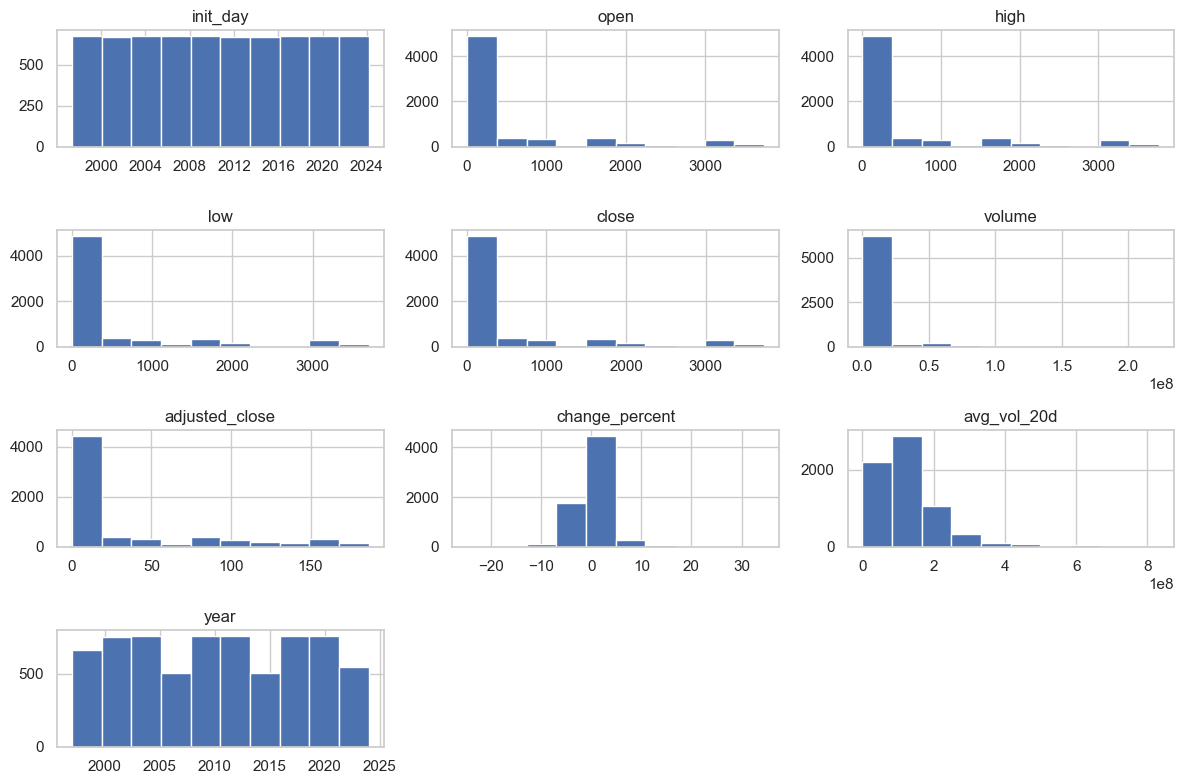

In [319]:
df.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

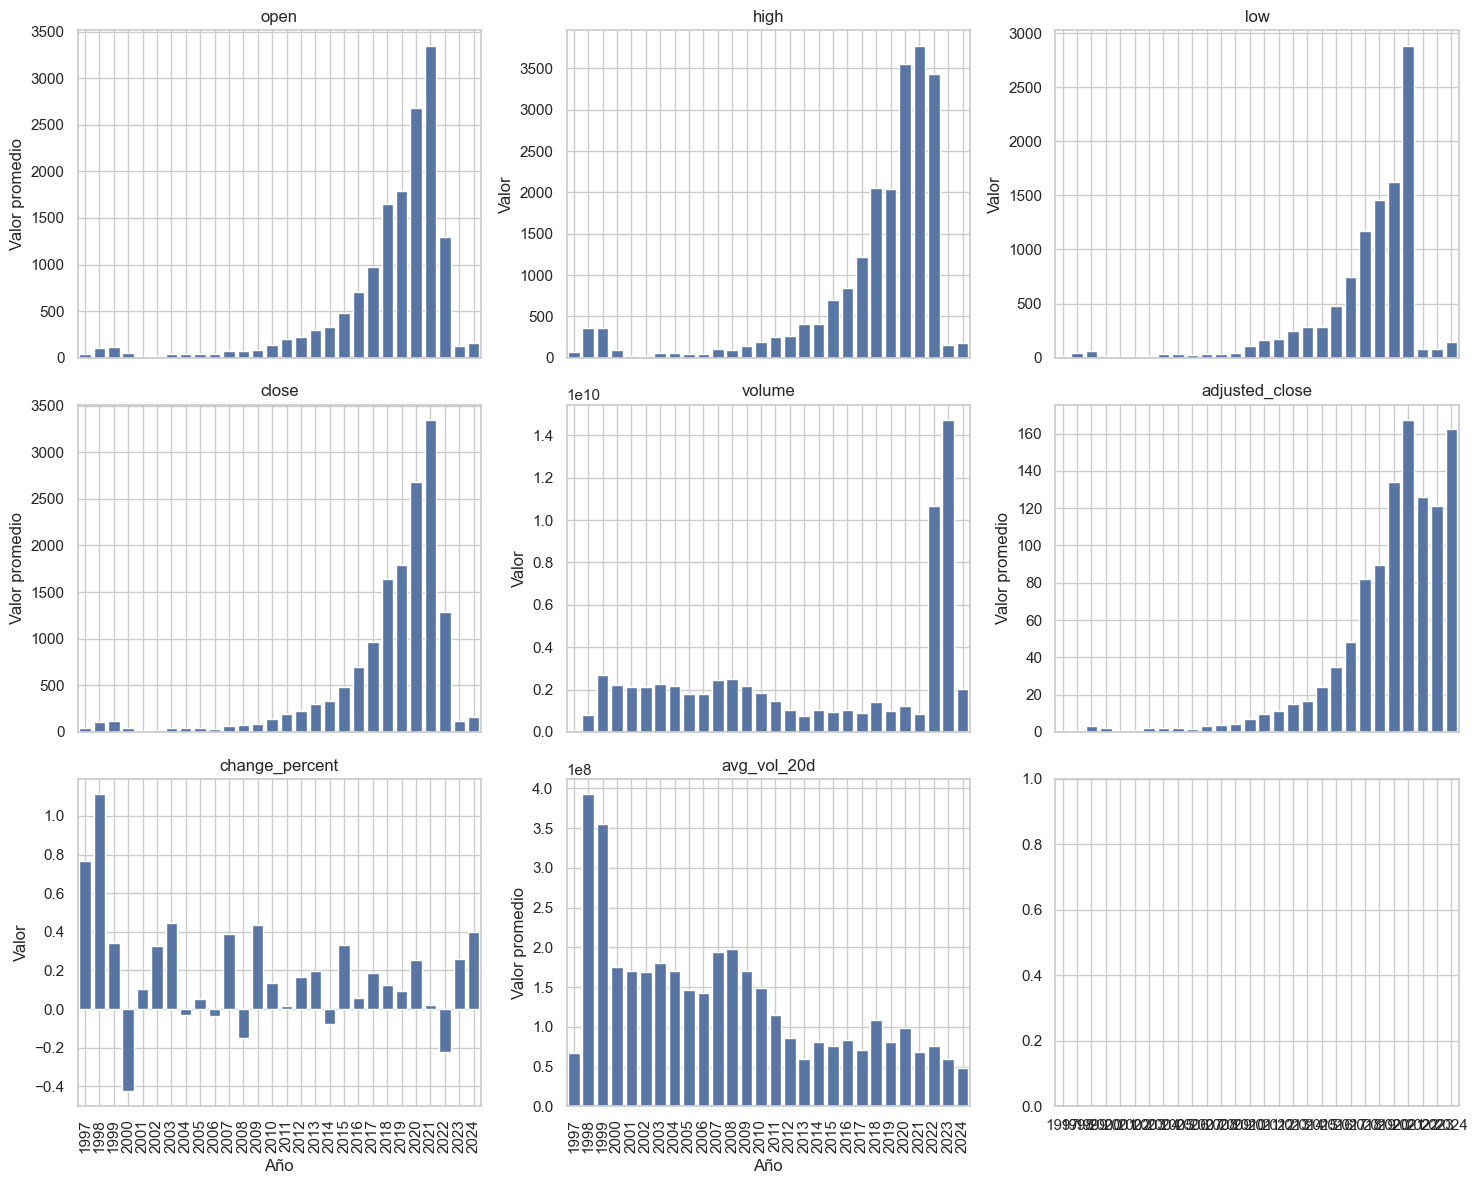

In [361]:
# Agrupar los datos por año y calcular estadísticas resumidas para cada variable
grouped_data = df.groupby(df['init_day'].dt.year).agg({
    'open': 'mean',
    'high': 'max',
    'low': 'min',
    'close': 'mean',
    'volume': 'sum',
    'adjusted_close': 'mean',
    'change_percent': 'mean',
    'avg_vol_20d': 'mean'
})


fig, axes = plt.subplots(3, 3, figsize=(15, 12), sharex=True)

# Iterar sobre las columnas del DataFrame y crear gráficos para cada variable
for i, (col, ax) in enumerate(zip(grouped_data.columns, axes.flatten())):
    sns.barplot(x=grouped_data.index, y=grouped_data[col], ax=ax)
    ax.set_title(col)
    ax.set_xlabel('Año')
    ax.set_ylabel('Valor promedio' if col in ['open', 'close', 'adjusted_close', 'avg_vol_20d'] else 'Valor')
    ax.grid(True)
    ax.set_xticklabels(grouped_data.index, rotation=90)

# Ajustar el diseño de los subgráficos
plt.tight_layout()


# Mostrar los gráficos
plt.show()

In [367]:
from datetime import datetime, timedelta

/var/folders/zx/259md1zj1gv342qj0rq5wk8h0000gq/T/ipykernel_10501/3212270016.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_last_10_years['Month'] = df_last_10_years['init_day'].dt.month


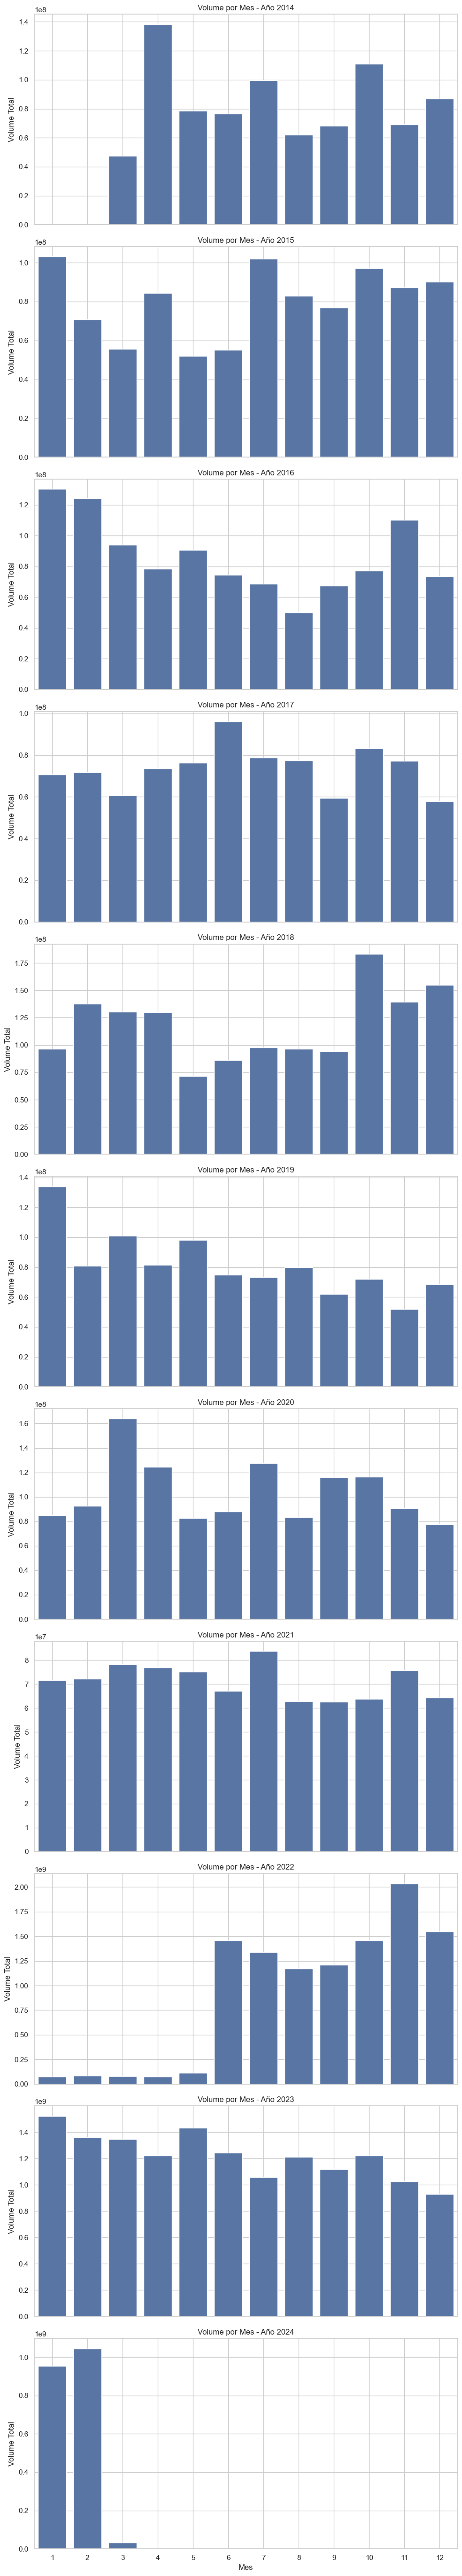

In [371]:


# Calcular la fecha hace 10 años
ten_years_ago = datetime.now() - timedelta(days=10*365)

# Filtrar el DataFrame para incluir solo los datos de los últimos 10 años
df_last_10_years = df[df['init_day'] >= ten_years_ago]

# Agregar una nueva columna para el mes
df_last_10_years['Month'] = df_last_10_years['init_day'].dt.month

# Agrupar los datos por año y mes, calcular estadísticas resumidas para 'volume'
grouped_data = df_last_10_years.groupby([df_last_10_years['init_day'].dt.year, df_last_10_years['Month']])['volume'].sum().unstack()

# Crear subgráficos para cada año
fig, axes = plt.subplots(len(grouped_data.index), 1, figsize=(10, len(grouped_data.index) * 5), sharex=True)

# Iterar sobre los años y crear gráficos para 'volume' por mes
for i, year in enumerate(grouped_data.index):
    sns.barplot(x=grouped_data.columns, y=grouped_data.loc[year], ax=axes[i])
    axes[i].set_title(f'Volume por Mes - Año {year}')
    axes[i].set_ylabel('Volume Total')
    axes[i].set_xlabel('Mes')
    axes[i].grid(True)


plt.tight_layout()

plt.show()

# se hace un comparativo de los ultimos 10 años por mes donde se ve por año en que mes se han tenido mas volumen de operaciones lo cual provoca variaciones en el valor de la accion notando que en 2020, empezo el incremento en el volumen de esta y en 2021 hubo un crecimiento expotencial en el volumen de operaciones.

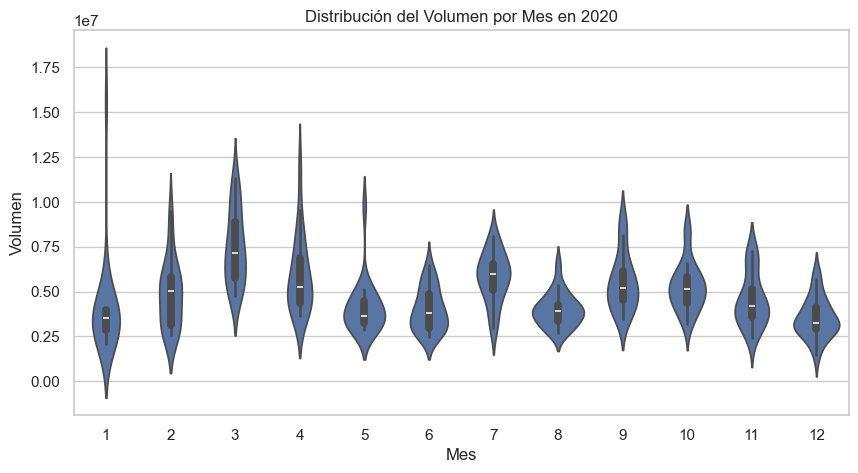

In [370]:

# Filtrar el DataFrame para incluir solo los datos del año 2020
df_2020 = df[df['init_day'].dt.year == 2020]

plt.figure(figsize=(10, 5))  

# Utilizar la variable 'volume' como eje y y 'Month' como eje x
sns.violinplot(data=df_2020, x='Month', y='volume')

plt.xlabel('Mes')  
plt.ylabel('Volumen')  
plt.title('Distribución del Volumen por Mes en 2020')  

plt.show()  

# Correlacion de pearson

In [373]:
correlation_volume_close = df['volume'].corr(df['close'])
print("Correlación de Pearson entre 'volume' y 'close':", correlation_volume_close)

Correlación de Pearson entre 'volume' y 'close': -0.17964393982999666


## el valor de -0.17964393982999666 indica una correlación negativa débil entre 'volume' y 'close'. Esto sugiere que cuando el volumen de operaciones aumenta, el precio de cierre tiende a disminuir ligeramente, y viceversa. Sin embargo, la correlación es débil, lo que significa que la relación no es muy fuerte y puede haber otras variables que influyan en la relación entre 'volume' y 'close'.

In [374]:
correlation_volume_close = df['volume'].corr(df['adjusted_close'])
print("Correlación de Pearson entre 'volume' y 'close':", correlation_volume_close)

Correlación de Pearson entre 'volume' y 'close': 0.3115446210542501


## el valor de 0.3115446210542501 indica una correlación positiva moderada entre 'volume' y 'adjusted_close'. Esto sugiere que cuando el volumen de operaciones aumenta, el precio de cierre ajustado tiende a aumentar también, y viceversa. Sin embargo, la correlación no es muy fuerte, lo que significa que la relación puede ser influenciada por otras variables o factores.

In [375]:
correlation_volume_close = df['close'].corr(df['adjusted_close'])
print("Correlación de Pearson entre 'volume' y 'close':", correlation_volume_close)

Correlación de Pearson entre 'volume' y 'close': 0.8220422080333706


## el valor de 0.8220422080333706 indica una correlación positiva fuerte entre 'close' y 'adjusted_close'. Esto sugiere que hay una alta relación lineal entre el precio de cierre y el precio de cierre ajustado, lo que significa que tienden a moverse en la misma dirección y en proporción.

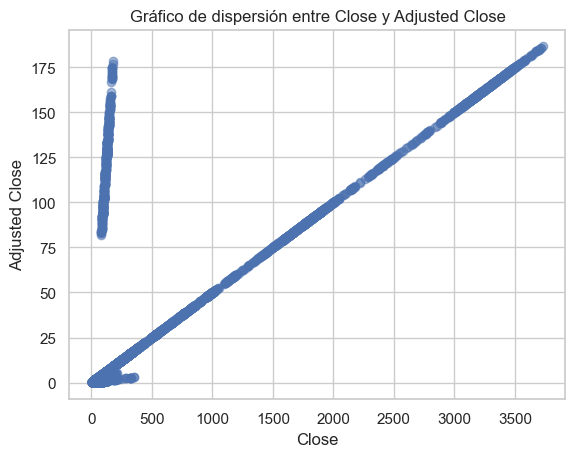

In [376]:
plt.scatter(df['close'], df['adjusted_close'], alpha=0.5)  # alpha controla la opacidad de los puntos
plt.title('Gráfico de dispersión entre Close y Adjusted Close')
plt.xlabel('Close')
plt.ylabel('Adjusted Close')
plt.grid(True)
plt.show()

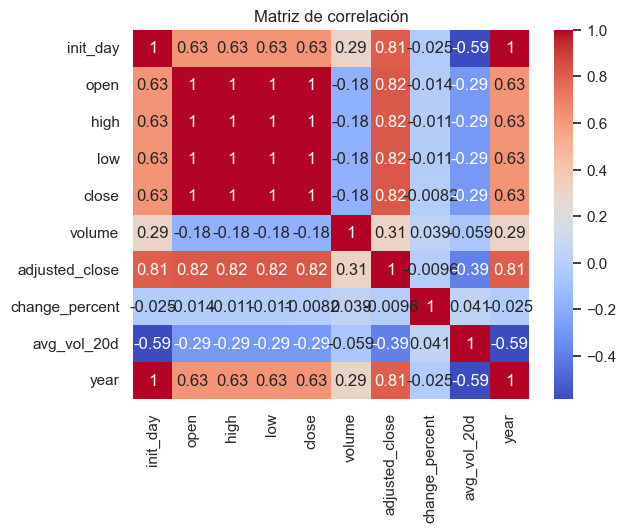

In [320]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()


## se puede ver que avg_vol_20d tiene una correlacion debil con todas las demas variables y que open, high, low, close tiene  correlacion fuerte entre si asi como adjusted close pero sin llegar a 1.

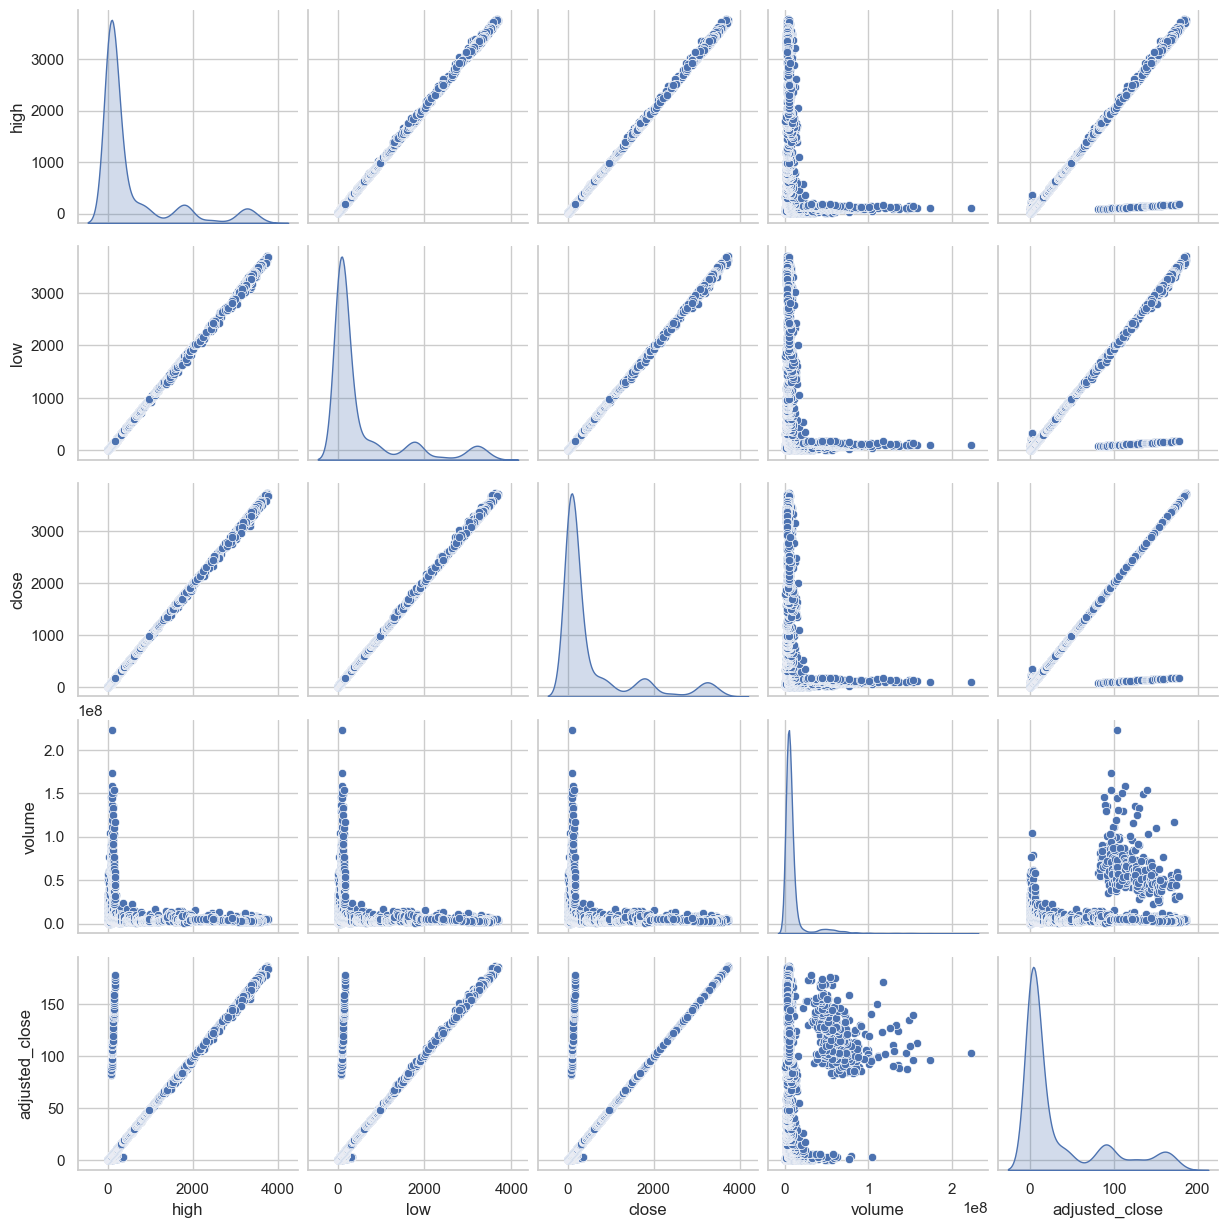

In [321]:
sns.pairplot(df[['init_day', 'high', 'low', 'close', 'volume', 'adjusted_close']], diag_kind='kde')
plt.show()

In [378]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [383]:
X = df['close'].values.reshape(-1, 1)  # Variable independiente
y = df['adjusted_close'].values  # Variable dependiente

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y ajustar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el error cuadrático medio
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio:", mse)

# Visualizar la pendiente y la intersección
print("Pendiente:", model.coef_[0])
print("Intersección:", model.intercept_)

Error cuadrático medio: 706.260513875857
Pendiente: 0.04605092834779933
Intersección: 9.763886562772612


In [398]:
print(len(X_test))  # Imprime la longitud de X_test
print(len(y_test))

1349
1349


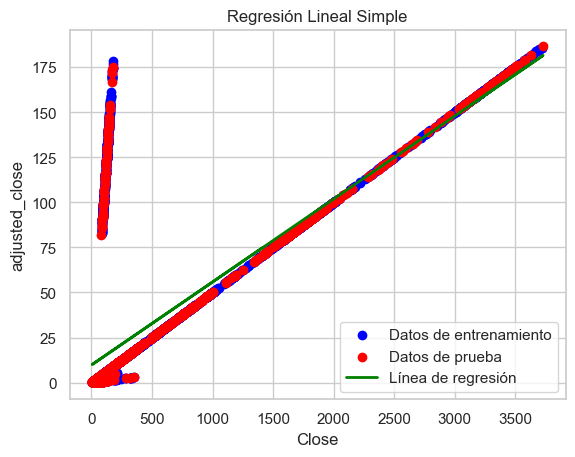

In [384]:

# Graficar los datos de entrenamiento
plt.scatter(X_train, y_train, color='blue', label='Datos de entrenamiento')

# Graficar los datos de prueba
plt.scatter(X_test, y_test, color='red', label='Datos de prueba')

# Graficar la línea de regresión
plt.plot(X_test, y_pred, color='green', linewidth=2, label='Línea de regresión')

# Etiquetas y título
plt.xlabel('Close')
plt.ylabel('adjusted_close')
plt.title('Regresión Lineal Simple')
plt.legend()

# Mostrar la gráfica
plt.show()

In [396]:
y_predict = model.predict(X_test)

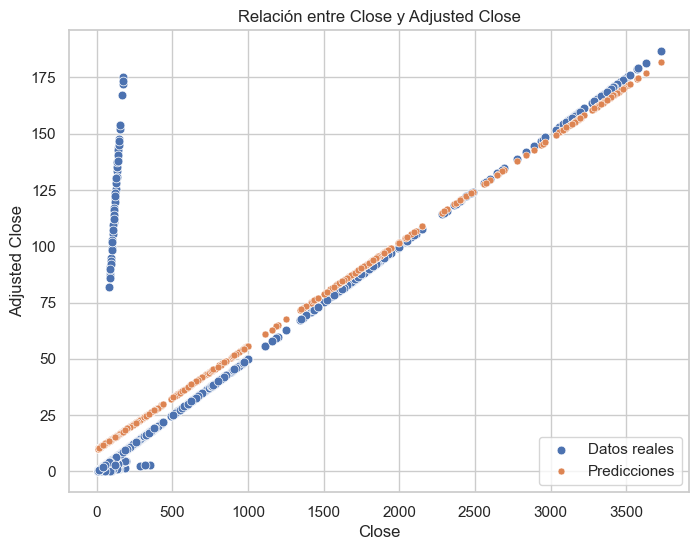

In [386]:
# Visualizar la relación entre los datos originales y las predicciones
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test.flatten(), y=y_test, s=40, label='Datos reales')  # Datos reales
sns.scatterplot(x=X_test.flatten(), y=y_pred, s=25, label='Predicciones')  # Predicciones del modelo

# Añadir etiquetas y título al gráfico
plt.xlabel('close')
plt.ylabel('Adjusted Close')
plt.title('Relación entre Close y Adjusted Close')
plt.legend()

# Mostrar el gráfico
plt.show()

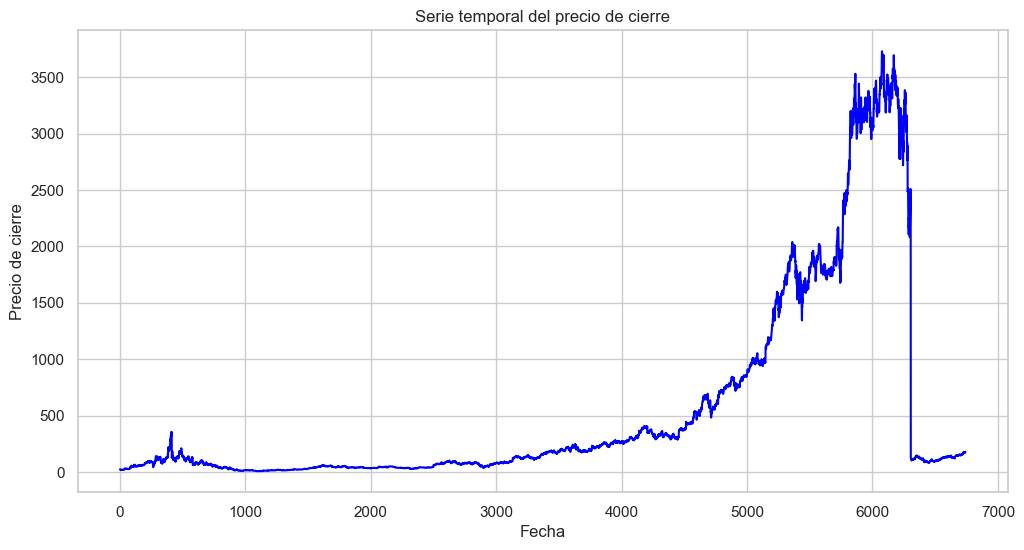

In [322]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['close'], color='blue')
plt.title('Serie temporal del precio de cierre')
plt.xlabel('Fecha')
plt.ylabel('Precio de cierre')
plt.grid(True)
plt.show()

## Modelo de regresion lineal

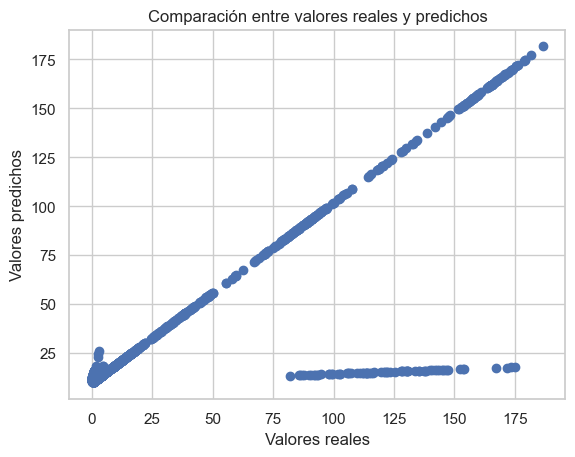

In [402]:


# Crear y ajustar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)


# trazar un gráfico de dispersión entre los valores reales (y_test) y las predicciones (y_pred)
plt.scatter(y_test, y_pred)
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.title('Comparación entre valores reales y predichos')
plt.show()

In [406]:
X = df['close'].values.reshape(-1, 1)  # Variable independiente
y = df['adjusted_close'].values  # Variable dependiente

# Entrenar el modelo de regresión lineal
model.fit(X, y)

# Predice el valor de la acción para dentro de 5 años
ultimo_precio = X[-1]  # Último precio en tus datos históricos
n_dias = 5 * 365  # 5 años
nuevos_dias = npy.arange(1, n_dias + 1).reshape(-1, 1)

# Crea una serie temporal de días comenzando desde el último día en tus datos históricos hasta dentro de 5 años
nuevos_dias_despues_5_anios = npy.arange(len(X) + 1, len(X) + n_dias + 1).reshape(-1, 1)

# Utiliza tu modelo de regresión lineal para predecir los precios de cierre para los nuevos días
y_pred_5_anios = model.predict(nuevos_dias_despues_5_anios)



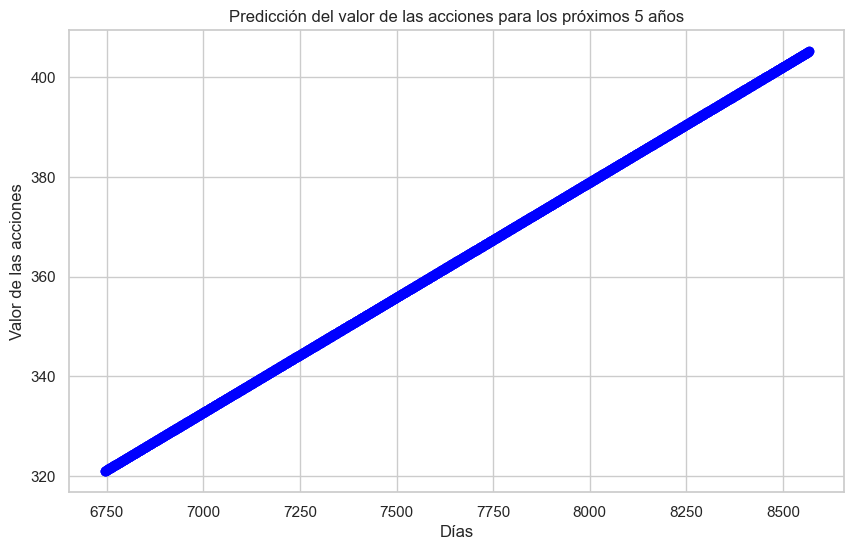

In [407]:
plt.figure(figsize=(10, 6))
plt.plot(nuevos_dias_despues_5_anios, y_pred_5_anios, color='blue', linestyle='-', marker='o')
plt.xlabel('Días')
plt.ylabel('Valor de las acciones')
plt.title('Predicción del valor de las acciones para los próximos 5 años')
plt.grid(True)
plt.show()

In [408]:
import pandas as pd

# Crear un DataFrame con las fechas y los valores predichos
df_predicciones = pd.DataFrame({
    'Días': nuevos_dias_despues_5_anios.flatten(),
    'Valor predicho': y_pred_5_anios.flatten()
})

# Mostrar la tabla de predicciones
print(df_predicciones)

      Días  Valor predicho
0     6744      320.960450
1     6745      321.006655
2     6746      321.052860
3     6747      321.099066
4     6748      321.145271
...    ...             ...
1820  8564      405.054090
1821  8565      405.100295
1822  8566      405.146500
1823  8567      405.192705
1824  8568      405.238911

[1825 rows x 2 columns]


In [414]:
print(df_predicciones['Fecha'].dtype)

int64


In [426]:
df['open'].sample(n=20, replace=False)

4450     300.0000
3426     181.9020
4682     666.8301
1474      27.5900
6136    3289.0100
599       79.8125
1910      40.1600
3017      76.2500
5671    1779.9200
4810     692.0100
5482    1635.2500
2503      61.9100
436      114.3760
2350      32.4100
587       62.7500
556      102.1260
1406      22.3300
5620    1824.0200
2524      69.0600
4126     311.5000
Name: open, dtype: float64

In [427]:

# Definir el tamaño de las muestras Bootstrap
n_samples = 1000  # Número de muestras Bootstrap a generar

# Número de iteraciones Bootstrap
n_iterations = 1000  # Número de veces que generaremos muestras Bootstrap

# Calcular la media de la columna 'close' original
mean_original = df['close'].mean()

# Crear una lista para almacenar las medias Bootstrap
bootstrap_means = []

# Realizar el Bootstrap
for _ in range(n_iterations):
    # Muestreo Bootstrap: seleccionar aleatoriamente n_samples observaciones con reemplazo
    bootstrap_sample = npy.random.choice(df['close'], size=n_samples, replace=True)
    
    # Calcular la media de la muestra Bootstrap y agregarla a la lista
    bootstrap_mean = npy.mean(bootstrap_sample)
    bootstrap_means.append(bootstrap_mean)

# Calcular el error estándar de las medias Bootstrap
bootstrap_std_error = npy.std(bootstrap_means)

# Calcular el intervalo de confianza del 95% para la media Bootstrap
confidence_interval = npy.percentile(bootstrap_means, [2.5, 97.5])

# Imprimir resultados
print("Media original:", mean_original)
print("Error estándar de las medias Bootstrap:", bootstrap_std_error)
print("Intervalo de confianza del 95% para la media Bootstrap:", confidence_interval)

Media original: 557.5569730090465
Error estándar de las medias Bootstrap: 29.067851644989208
Intervalo de confianza del 95% para la media Bootstrap: [503.26325107 618.72805633]


## En resumen, estos resultados sugieren que la media de la columna 'close' de tus datos podría estar alrededor de 557.56, con un intervalo de confianza del 95% que va desde aproximadamente 503.26 hasta 618.73. El error estándar de las medias Bootstrap es relativamente bajo, lo que sugiere una buena precisión en nuestra estimación de la media.

In [428]:
close_values = df['close']  # Seleccionamos la columna 'close' como nuestra variable de interés

means = []

# Realizamos 100,000 iteraciones para Bootstrap
for i in range(100000):
    # Tomamos una muestra aleatoria con reemplazo de los valores de 'close'
    sample = close_values.sample(n=len(close_values), replace=True)
    # Calculamos la media de la muestra y la agregamos a la lista de medias
    means.append(sample.mean())

# Creamos una Serie con las medias calculadas
serie_means = pd.Series(means)


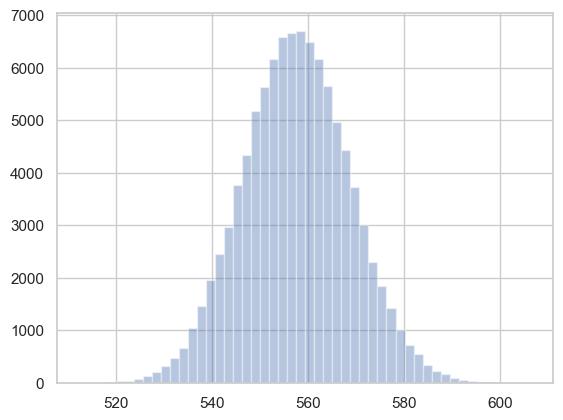

In [429]:
sns.distplot(serie_means, kde=False, norm_hist=False);

In [430]:
serie_means.skew()

0.02869343932468661

## En este caso, un sesgo de 0.0287 indica una ligera asimetría hacia la derecha, pero en general, la distribución es bastante simétrica. Es importante considerar que la interpretación del sesgo depende del contexto de los datos y la aplicación específica.

In [440]:
close = df['close']

means = []

for i in range(100_000):
    sample = close.sample(n=50, replace=True)
    means.append(sample.mean())
    
serie_means = pd.Series(means)

In [431]:
serie_means.kurtosis()

-0.03701906365568286

## una kurtosis de -0.0370 indica que la distribución de los datos es ligeramente menos puntiaguda que una distribución normal, es decir, tiene colas más ligeras y un pico ligeramente más bajo.

In [432]:
print(f'Error estandar: {serie_means.std()}')

Error estandar: 11.079373958589926


## el error estándar de 11.079373958589926 indica que, en promedio, las medias Bootstrap de las muestras de tu conjunto de datos varían alrededor de la media original por aproximadamente 11.08 unidades. Este valor te proporciona una medida de la precisión de tu estimación de la media mediante Bootstrap. Cuanto menor sea el error estándar, mayor será la precisión de tu estimación.

In [433]:
print(f'Valor mínimo: {serie_means.min()}')
print(f'Valor máximo: {serie_means.max()}')
print(f'Rango: {serie_means.max() - serie_means.min()}')

Valor mínimo: 512.5792766572742
Valor máximo: 606.3998048494735
Rango: 93.82052819219928



## El rango es una medida estadística que indica la diferencia entre el valor máximo y el valor mínimo en un conjunto de datos.El rango de 93.82052819219928 indica que la diferencia entre el valor máximo y el valor mínimo de las medias Bootstrap obtenidas es de aproximadamente 93.82 unidades.

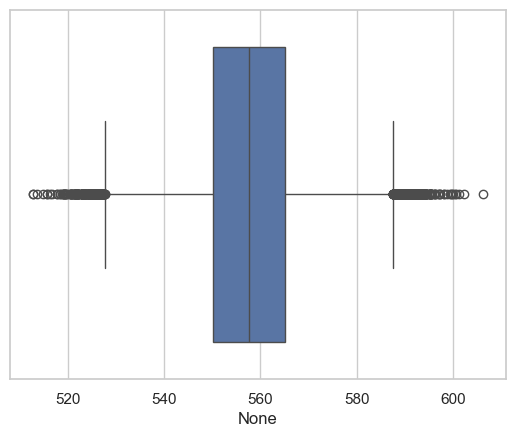

In [435]:
sns.boxplot(x =serie_means);

In [436]:
limite_inferior = serie_means.quantile(0.025)
limite_superior = serie_means.quantile(0.975)

In [442]:
print(f'Intervalo de 95% confianza de la media: {limite_inferior} < {close.mean()} < {limite_superior}')

Intervalo de 95% confianza de la media: 536.1369724195463 < 557.5569730090465 < 579.5055249662613


In [443]:
mean_of_intervals = ((close.mean() - limite_inferior) + (limite_superior - close.mean())) / 2

print(f'Intervalo de 95% confianza de la media: {close.mean()} +/- {mean_of_intervals}')

Intervalo de 95% confianza de la media: 557.5569730090465 +/- 21.68427627335751


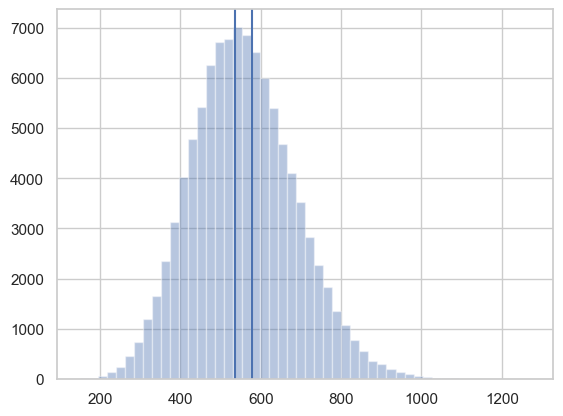

In [444]:
sns.distplot(serie_means, kde=False, norm_hist=False)
plt.axvline(limite_inferior)
plt.axvline(limite_superior);

## Validacion cruzada

In [446]:
from sklearn.model_selection import cross_val_score

In [448]:
# X es tu variable independiente (características) y y es tu variable dependiente (objetivo)
X = df[['close']]  # Ajusta esto según tus datos
y = df['adjusted_close']  # Ajusta esto según tus datos

# Crear un modelo de regresión lineal
model = LinearRegression()

# Realizar validación cruzada con 5 particiones (k = 5)
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# La validación cruzada devuelve el negativo del error cuadrático medio (Negative MSE)
# Convertimos los valores negativos a positivos y calculamos la raíz cuadrada para obtener el RMSE
rmse_scores = npy.sqrt(-scores)

# Imprimir los resultados de la validación cruzada
print("Resultados de la validación cruzada:")
print("RMSE promedio:", rmse_scores.mean())
print("Desviación estándar del RMSE:", rmse_scores.std())

Resultados de la validación cruzada:
RMSE promedio: 22.876668892378085
Desviación estándar del RMSE: 22.40613767616617


In [451]:
scores

array([ -209.68701677,  -155.79177169,  -133.16924436,   -69.99807009,
       -4558.23882297])

In [450]:
print(f'Score del modelo: {scores.mean():.3f} +/- {scores.std():.3f}')

Score del modelo: -1025.377 +/- 1766.999


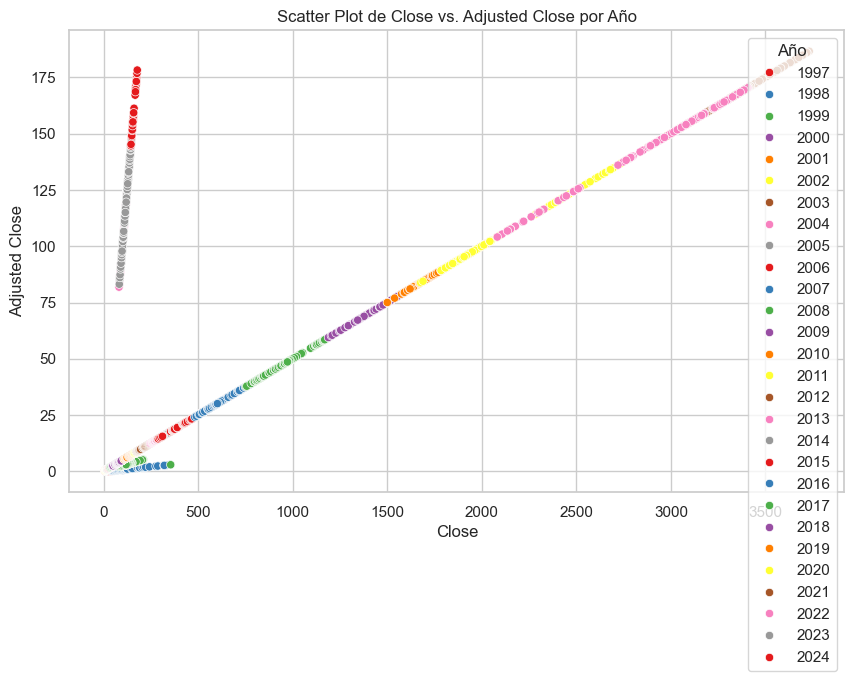

In [455]:


# Crear el scatter plot por categorías (en este caso, por año)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='close', y='adjusted_close', hue='year', palette='Set1')

# Agregar título y etiquetas de los ejes
plt.title('Scatter Plot de Close vs. Adjusted Close por Año')
plt.xlabel('Close')
plt.ylabel('Adjusted Close')


plt.legend(title='Año')


plt.show()

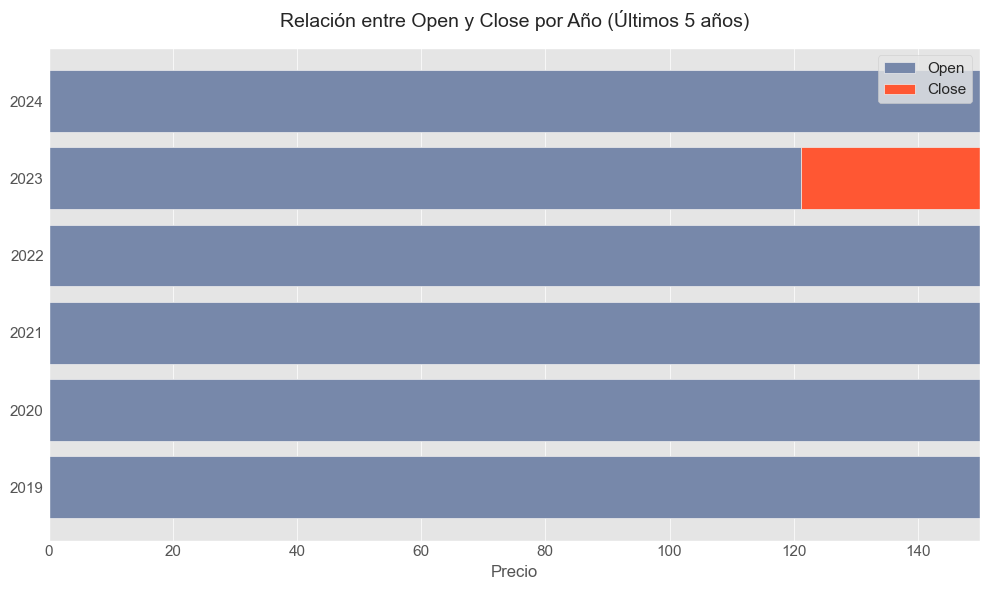

In [491]:

# Convierte la columna 'init_day' a tipo datetime si aún no lo está
df['init_day'] = pd.to_datetime(df['init_day'])

# Filtra los datos para incluir solo los últimos 5 años
df_last_5_years = df[df['init_day'] >= df['init_day'].max() - pd.DateOffset(years=5)]

# Agrupa los datos por año y calcula el promedio de 'open' y 'close' para cada año
grouped_data = df_last_5_years.groupby(df_last_5_years['init_day'].dt.year)[['open', 'close']].mean()

# Graficar barras apiladas horizontalmente
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(10, 6))

plt1 = ax.barh(grouped_data.index, grouped_data['open'], label='Open', color="#7788AA")
plt2 = ax.barh(grouped_data.index, grouped_data['close'], left=grouped_data['open'], label='Close', color="#FF5733")

ax.set_xlabel('Precio')
ax.set_title('Relación entre Open y Close por Año (Últimos 5 años)', fontsize=14, pad=15)
plt.legend((plt1[0], plt2[0]), ('Open', 'Close'))
ax.set_xlim(0, 150)  # Ajusta el límite superior del eje x según tus datos

plt.tight_layout()

plt.show()

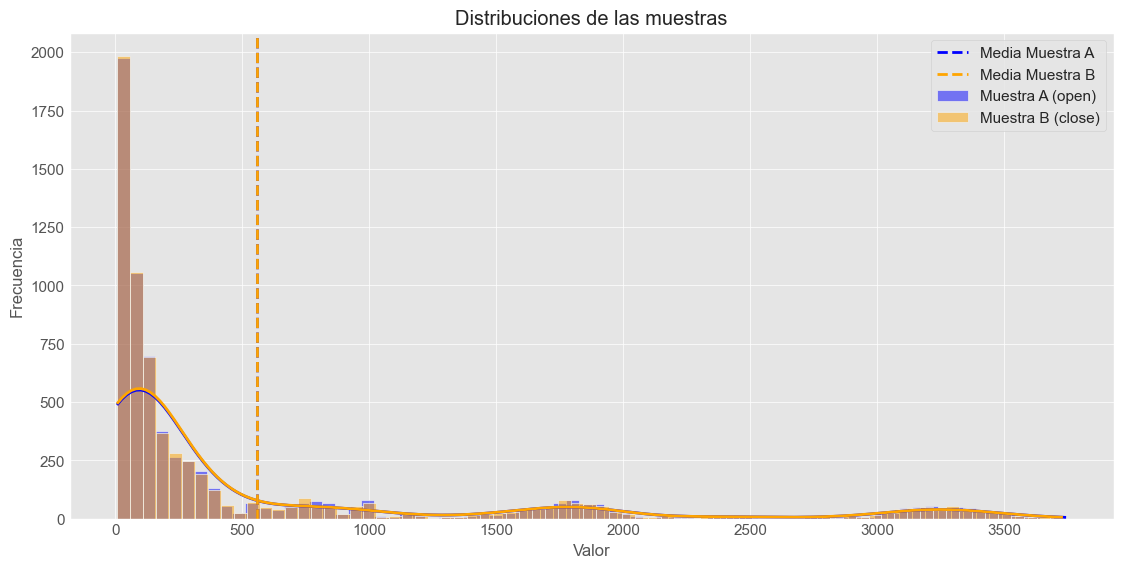

Estadístico t: 0.013292721410328263
Valor p: 0.9893944518065328
No se puede rechazar la hipótesis nula. No hay suficiente evidencia para decir que las muestras tienen medias diferentes.


In [493]:
sample_a = df['open']  # Muestra A, por ejemplo 'open'
sample_b = df['close']  # Muestra B, por ejemplo 'close'

# Realizar la prueba t de Student
t_statistic, p_value = stats.ttest_ind(sample_a, sample_b)

# Visualización de las distribuciones de las muestras y la ubicación de las medias
plt.figure(figsize=(12, 6))

sns.histplot(sample_a, color='blue', label='Muestra A (open)', kde=True)
sns.histplot(sample_b, color='orange', label='Muestra B (close)', kde=True)

plt.axvline(sample_a.mean(), color='blue', linestyle='dashed', linewidth=2, label='Media Muestra A')
plt.axvline(sample_b.mean(), color='orange', linestyle='dashed', linewidth=2, label='Media Muestra B')

plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Distribuciones de las muestras')
plt.legend()
plt.show()

# Imprimir el resultado de la prueba
print("Estadístico t:", t_statistic)
print("Valor p:", p_value)

# Interpretación del resultado
alpha = 0.05  # Nivel de significancia
if p_value < alpha:
    print("Se rechaza la hipótesis nula. Hay evidencia suficiente para decir que las muestras tienen medias diferentes.")
else:
    print("No se puede rechazar la hipótesis nula. No hay suficiente evidencia para decir que las muestras tienen medias diferentes.")

## Dado que el valor p (0.989) es mayor que el nivel de significancia (por ejemplo, 0.05), no tenemos evidencia suficiente para rechazar la hipótesis nula. En otras palabras, no hay suficiente evidencia para decir que las medias de las dos muestras (columnas 'open' y 'close') son diferentes.

## no se usan herramientas como regex o kitk por no usarse o buscarse datos por categorias o expresiones espcificas

In [496]:
from sklearn.cluster import KMeans
# Seleccionamos las características para el análisis de k-medias
X = df[['close', 'volume']]

# Normalizamos las características si es necesario
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# Definimos el número de clústeres (k)
k = 3

# Aplicamos k-medias
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

# Etiquetamos los clústeres asignados a cada muestra
labels = kmeans.labels_

# Analizamos los resultados
# Por ejemplo, podríamos agregar las etiquetas al DataFrame original para visualizar los clústeres
df['cluster'] = labels

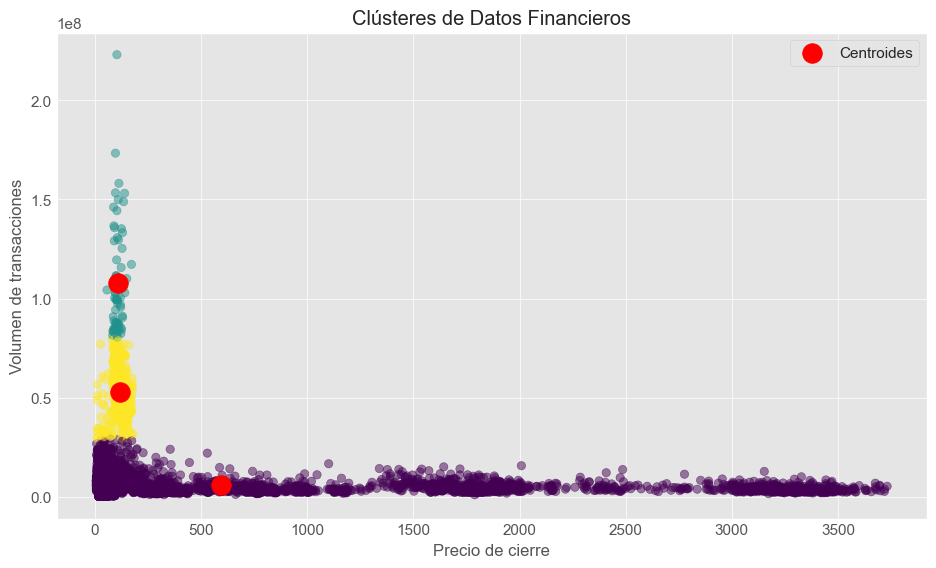

In [497]:
# Graficar los clústeres
plt.figure(figsize=(10, 6))

# Suponiendo que df['close'] y df['volume'] son las características que utilizamos para el análisis
plt.scatter(df['close'], df['volume'], c=labels, cmap='viridis', alpha=0.5)
plt.xlabel('Precio de cierre')
plt.ylabel('Volumen de transacciones')
plt.title('Clústeres de Datos Financieros')

# Mostrar los centroides de los clústeres
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', s=200, color='red', label='Centroides')

plt.legend()
plt.grid(True)
plt.show()

In [498]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calcular el puntaje de área bajo la curva ROC
auc_score = roc_auc_score(y_true, y_pred)

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_true, y_pred)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()

NameError: name 'y_true' is not defined